In [1]:
# 1) Imports & load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [21]:
# Goal:

# The dataset contains customer demographics, purchase behavior, and marketing campaign responses. 
# The goal was to identify distinct customer groups to help the company design targeted marketing campaigns, 
# optimize spending, and improve campaign efficiency.


In [2]:
# Load dataset (change path)
df = pd.read_csv("marketing_campaign.csv", sep='\t')
print("Data shape:", df.shape)
df.head()

Data shape: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
# 2) Preprocess: numeric selection, imputation, scaling
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

X = df[numeric_cols].copy()

# Impute missing values (median)
imputer = SimpleImputer(strategy="median")
X_imp = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imp)


Numeric columns: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


      PC  ExplainedVariance  ExplainedVarianceRatio  CumulativeVarianceRatio
0    PC1             6.5182                  0.2715                   0.2715
1    PC2             2.0249                  0.0843                   0.3558
2    PC3             1.8970                  0.0790                   0.4348
3    PC4             1.4079                  0.0586                   0.4934
4    PC5             1.1124                  0.0463                   0.5398
5    PC6             1.0377                  0.0432                   0.5830
6    PC7             1.0169                  0.0424                   0.6253
7    PC8             0.9387                  0.0391                   0.6644
8    PC9             0.8576                  0.0357                   0.7002
9   PC10             0.7607                  0.0317                   0.7318
10  PC11             0.7451                  0.0310                   0.7629
11  PC12             0.6622                  0.0276                   0.7904

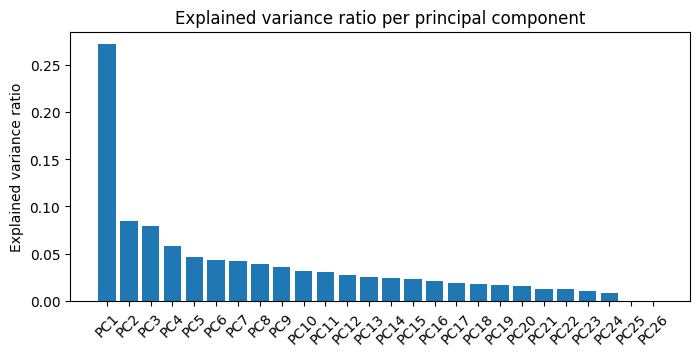

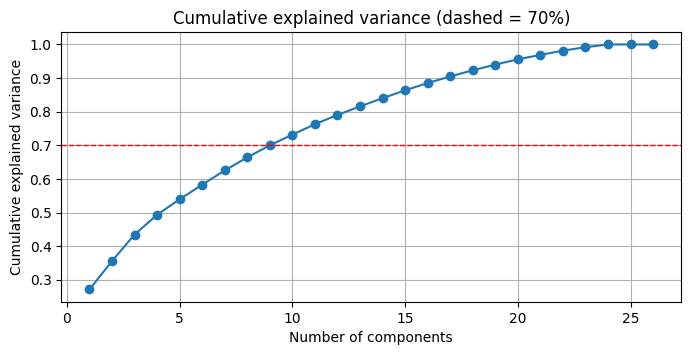

Components to retain 70% variance: 9


In [7]:
# 3) PCA: fit full PCA and show explained variance
pca_full = PCA()      # keep all components
pca_full.fit(X_scaled)

explained_var = pca_full.explained_variance_
explained_var_ratio = pca_full.explained_variance_ratio_
cumulative = np.cumsum(explained_var_ratio)

ev_df = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_var_ratio))],
    "ExplainedVariance": explained_var,
    "ExplainedVarianceRatio": explained_var_ratio,
    "CumulativeVarianceRatio": cumulative
})
pd.set_option("display.float_format", lambda x: f"{x:.4f}")
print(ev_df)

# Plots: explained ratio (bar) and cumulative (line)
plt.figure(figsize=(8,3.5))
plt.bar(ev_df["PC"], ev_df["ExplainedVarianceRatio"])
plt.ylabel("Explained variance ratio")
plt.title("Explained variance ratio per principal component")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,3.5))
plt.plot(range(1,len(cumulative)+1), cumulative, marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.axhline(0.70, color="r", linestyle="--", linewidth=1)  # 90% guideline
plt.title("Cumulative explained variance (dashed = 70%)")
plt.grid(True)
plt.show()

# Automatically choose number of components to retain a threshold (e.g., 70%)
threshold = 0.70
n_components = int(np.searchsorted(cumulative, threshold) + 1)
print(f"Components to retain {threshold*100:.0f}% variance: {n_components}")

In [8]:
# 4) Create PCA-transformed dataset for clustering
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("PCA shape:", X_pca.shape)   # (n_samples, n_components)

PCA shape: (2240, 9)


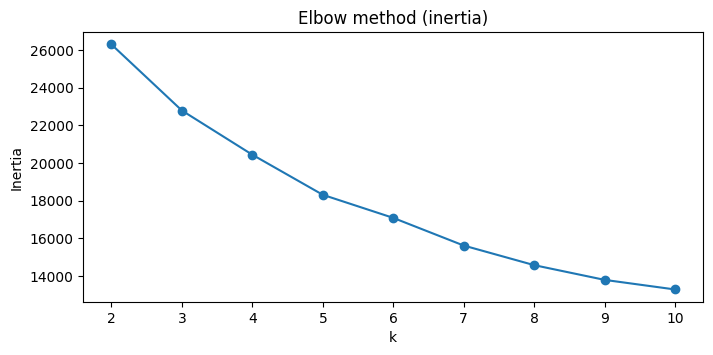

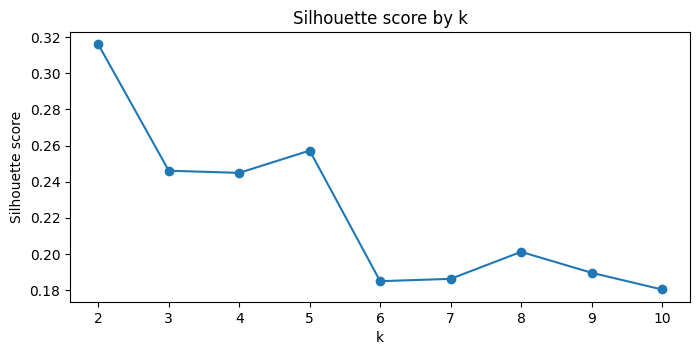

In [9]:
# 5) Find optimal k using inertia and silhouette score
k_range = range(2, 11)
inertias = []
sil_scores = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_pca)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_pca, labels))

# Plot inertia (elbow)
plt.figure(figsize=(8,3.5))
plt.plot(k_range, inertias, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow method (inertia)")
plt.xticks(k_range)
plt.show()

# Plot silhouette
plt.figure(figsize=(8,3.5))
plt.plot(k_range, sil_scores, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette score by k")
plt.xticks(k_range)
plt.show()

# Auto-pick k by max silhouette (you can override after visual inspection)
# optimal_k = k_range[int(np.argmax(sil_scores))]
# print("Optimal k by max silhouette:", optimal_k)
optimal_k = 3

In [10]:
# 6) Final KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)
df["Cluster"] = labels

# Cluster centers in PCA space and approximate centers back in original feature space
centers_pca = kmeans.cluster_centers_
centers_original_approx = scaler.inverse_transform(pca.inverse_transform(centers_pca))
centers_df = pd.DataFrame(centers_original_approx, columns=X.columns)
print("Approx cluster centers (original feature scale):")
display(centers_df.round(3))


Approx cluster centers (original feature scale):


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5483.1230,1962.8990,58208.9810,0.2680,0.9400,47.3990,450.4820,27.7470,155.0220,38.5010,...,5.7360,0.0500,0.1310,0.0150,0.0180,0.0270,0.0070,3.0000,11.0000,0.1100
1,5673.0200,1969.5060,77577.2020,0.0040,0.1410,49.8360,617.5070,68.0480,451.1240,97.4090,...,2.6670,0.0870,0.1330,0.2900,0.2450,0.0260,0.0050,3.0000,11.0000,0.3020
2,5617.8110,1972.1150,35308.7580,0.7840,0.4270,49.7940,49.2460,3.6320,26.1640,5.6870,...,6.4370,0.0800,0.0090,-0.0050,-0.0010,-0.0010,0.0130,3.0000,11.0000,0.0940


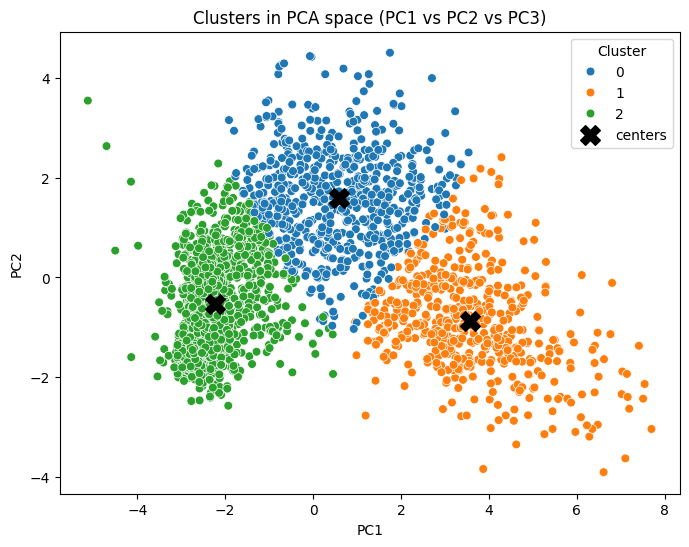

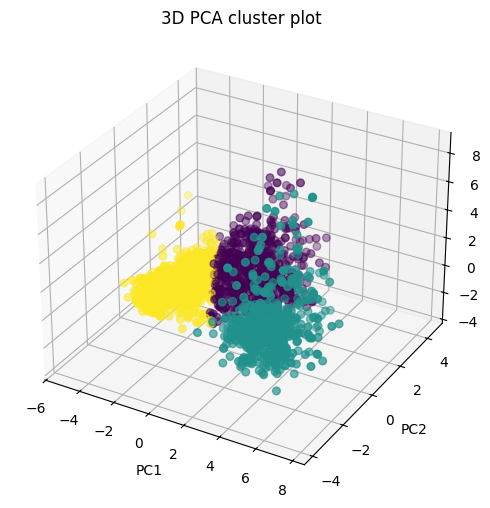

In [12]:
# 7) 2D scatter (first 2 PCs)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="tab10", s=40, legend="full")
plt.scatter(centers_pca[:,0], centers_pca[:,1], c="black", marker="X", s=200, label="centers")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("Clusters in PCA space (PC1 vs PC2 vs PC3)")
plt.legend(title="Cluster")
plt.show()

# 3D plot if we have at least 3 PCs
if X_pca.shape[1] >= 3:
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=labels, s=30)
    ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")
    plt.title("3D PCA cluster plot")
    plt.show()


In [13]:
# 8) Profiling: counts & descriptive stats on original numeric features
cluster_counts = df["Cluster"].value_counts().sort_index()
cluster_props = (cluster_counts / len(df)).round(3)
print("Counts per cluster:\n", cluster_counts)
print("Proportions:\n", cluster_props)

# Detailed profile: mean/median/std for numeric features by cluster
profile = df.groupby("Cluster")[X.columns].agg(["mean","median","std"]).round(3)
display(profile)

# Top differentiating features per cluster (relative to global mean)
global_mean = X_imp.mean()
cluster_means = df.groupby("Cluster")[X.columns].mean()
delta_pct = ((cluster_means - global_mean) / global_mean.replace(0, np.nan)).fillna(0)
top_features = {c: delta_pct.loc[c].sort_values(ascending=False).head(5).index.tolist()
                for c in delta_pct.index}
print("Top 5 positively different features per cluster (vs global mean):")
for c, feats in top_features.items():
    print(f" Cluster {c}: {feats}")



Counts per cluster:
 Cluster
0     647
1     548
2    1045
Name: count, dtype: int64
Proportions:
 Cluster
0   0.2890
1   0.2450
2   0.4670
Name: count, dtype: float64


ID                     Year_Birth                       Income  \
             mean    median       std       mean    median     std       mean   
Cluster                                                                         
0       5443.2360 5255.0000 3355.2430  1964.0430 1964.0000 10.2320 58459.5460   
1       5703.1200 5541.5000 3149.4040  1968.7760 1970.0000 13.6820 77930.3990   
2       5626.1760 5527.0000 3228.3140  1971.7700 1973.0000 11.0580 34879.1110   

                              Kidhome  ... Complain Z_CostContact         \
            median        std    mean  ...      std          mean median   
Cluster                                ...                                 
0       58692.0000 10889.5070  0.2100  ...   0.0960        3.0000 3.0000   
1       77261.5000 27878.8580  0.0400  ...   0.0600        3.0000 3.0000   
2       34578.0000 14292.6030  0.8010  ...   0.1110        3.0000 3.0000   

               Z_Revenue                Response                
           std      mean  median    std     mean median    std  
Cluster                                                         
0       0.0000   11.0000 11.0000 0.0000   0.1080 0.0000 0.3110  
1       0.0000   11.0000 11.0000 0.0000   0.3030 0.0000 0.4600  
2       0.0000   11.0000 11.0000 0.0000   0.0940 0.0000 0.2920  

[3 rows x 78 columns]

Top 5 positively different features per cluster (vs global mean):
 Cluster 0: ['Teenhome', 'AcceptedCmp4', 'NumWebPurchases', 'NumDealsPurchases', 'MntWines']
 Cluster 1: ['AcceptedCmp5', 'AcceptedCmp1', 'MntMeatProducts', 'MntFishProducts', 'MntFruits']
 Cluster 2: ['Kidhome', 'Complain', 'NumWebVisitsMonth', 'AcceptedCmp3', 'Recency']


In [17]:
# !pip install wordcloud

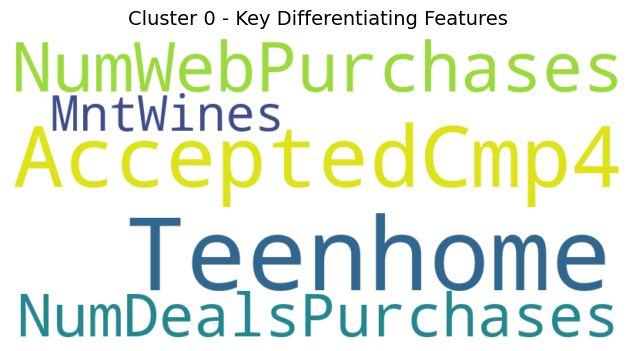

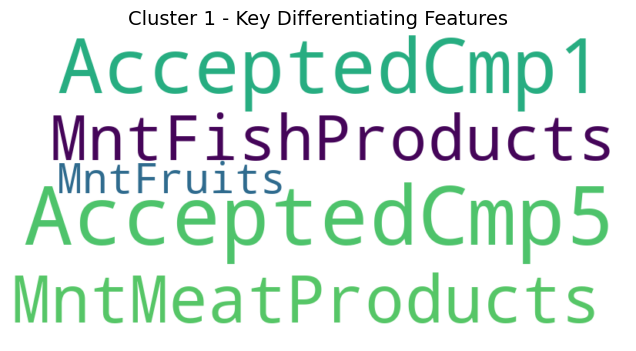

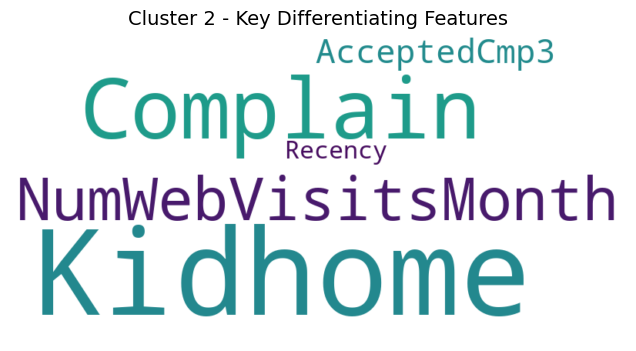

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate separate word clouds for each cluster
for cluster, features in top_features.items():
    # Scale word sizes by delta percentages (so more distinct features appear bigger)
    freqs = delta_pct.loc[cluster, features].to_dict()
    
    wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis")
    wc.generate_from_frequencies(freqs)
    
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"Cluster {cluster} - Key Differentiating Features", fontsize=14)
    plt.axis("off")
    plt.show()


## Conclusion

Top 5 positively different features per cluster (vs global mean):

Cluster 0: ['Teenhome', 'AcceptedCmp4', 'NumWebPurchases', 'NumDealsPurchases', 'MntWines']

Cluster 1: ['AcceptedCmp5', 'AcceptedCmp1', 'MntMeatProducts', 'MntFishProducts', 'MntFruits']

Cluster 2: ['Kidhome', 'Complain', 'NumWebVisitsMonth', 'AcceptedCmp3', 'Recency']

<!-- Cluster 0: The Deal-Seeking Family This cluster is characterized by customers who have teenagers at home and are highly motivated by discounts. They show a strong preference for shopping through the company's website and are more likely to have accepted the fourth campaign. A notable spending habit in this group is their higher expenditure on wine.

Cluster 1: The High-Spending, Campaign-Responsive Customer This cluster represents the company's affluent customers. Their defining features are a high expenditure on meat, fish, and fruits, indicating a willingness to spend more on premium food products. They are also highly responsive to specific marketing campaigns, particularly the first and fifth ones, making them a key target for future promotions.

Cluster 2: The Browsing, Inactive Family This cluster consists of customers who have children at home. Despite being frequent visitors to the website, they haven't made a recent purchase, as indicated by a high Recency value. This group also has a higher rate of complaints but, paradoxically, a higher acceptance rate for the third marketing campaign. This suggests they may be difficult to engage or have specific needs that were only met by that one campaign. -->

Cluster 0: The Deal-Seeking Family This cluster is characterized by customers who have teenagers at home and are highly motivated by discounts. They show a strong preference for shopping through the company's website and are more likely to have accepted the fourth campaign. A notable spending habit in this group is their higher expenditure on wine. 


Cluster 1: The High-Spending, Campaign-Responsive Customer This cluster represents the company's affluent customers. Their defining features are a high expenditure on meat, fish, and fruits, indicating a willingness to spend more on premium food products. They are also highly responsive to specific marketing campaigns, particularly the first and fifth ones, making them a key target for future promotions.


Cluster 2: The Browsing, Inactive Family This cluster consists of customers who have children at home. Despite being frequent visitors to the website, they haven't made a recent purchase, as indicated by a high Recency value. This group also has a higher rate of complaints but, paradoxically, a higher acceptance rate for the third marketing campaign. This suggests they may be difficult to engage or have specific needs that were only met by that one campaign. 